In [18]:
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

import spacy
from spacy import displacy
from textblob import TextBlob
from collections import Counter

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1. ### NER
   NER (Named Entity Recognization) is a component of natural language processing (NLP) that identifies predefined categories of objects in a body of text.

In [12]:
text = "Barack Obama was born in Hawaii. He was elected president in 2008."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
ner_tree = ne_chunk(pos_tags)

print(ner_tree)

(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  ./.
  He/PRP
  was/VBD
  elected/VBN
  president/NN
  in/IN
  2008/CD
  ./.)


2. ### Sentiment Analysis
   Sentiment Analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a body of text. It identifies and categorizes the sentiment expressed in the text, typically as positive, negative, or neutral.

In [13]:
analyzer = SentimentIntensityAnalyzer()
text = "I love this product! It has greatly improved my daily routine."
sentiment = analyzer.polarity_scores(text)

print(sentiment)

{'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.8353}


3. ### Part-of-Speech (POS) Tagging
   Part-of-Speech (POS) Tagging is a natural language processing (NLP) task that involves tagging each word in a sentence with its corresponding part of speech, such as noun, verb, or adjective. This helps in understanding the grammatical structure of the text and is useful for various linguistic analyses.

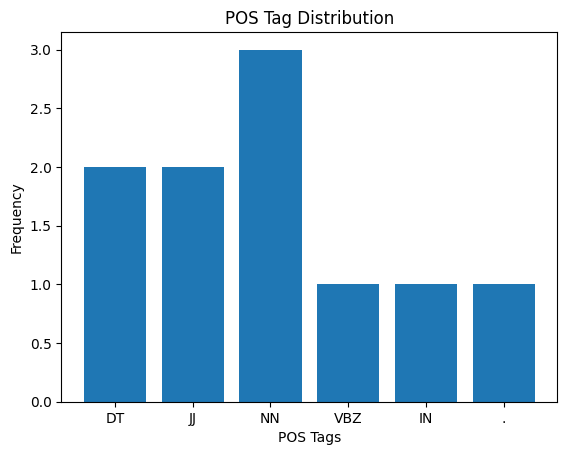

In [14]:
text = "The quick brown fox jumps over the lazy dog."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

# Visualize the POS tags
pos_counts = {}
for _, pos in pos_tags:
    if pos in pos_counts:
        pos_counts[pos] += 1
    else:
        pos_counts[pos] = 1

plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tag Distribution')
plt.show()

## Using Sapcy

In [17]:
# Load SpaCy's pre-trained model
nlp = spacy.load('en_core_web_sm')

# Example text
text = "Barack Obama was born in Hawaii. He was elected president in 2008."

# Process the text
doc = nlp(text)

# Extract and print named entities
for ent in doc.ents:
    print(ent.text, ent.label_)

# Visualization
displacy.render(doc, style='ent', jupyter=True)

Barack Obama PERSON
Hawaii GPE
2008 DATE


In [19]:
text = "I love this product! It's fantastic and works really well."

# Perform sentiment analysis
blob = TextBlob(text)
print(f"Sentiment polarity: {blob.sentiment.polarity}")  # Range from -1 (negative) to 1 (positive)
print(f"Sentiment subjectivity: {blob.sentiment.subjectivity}")  # Range from 0 (objective) to 1 (subjective)


Sentiment polarity: 0.40833333333333327
Sentiment subjectivity: 0.5666666666666667


The DET DT
quick ADJ JJ
brown ADJ JJ
fox NOUN NN
jumps VERB VBZ
over ADP IN
the DET DT
lazy ADJ JJ
dog NOUN NN
. PUNCT .


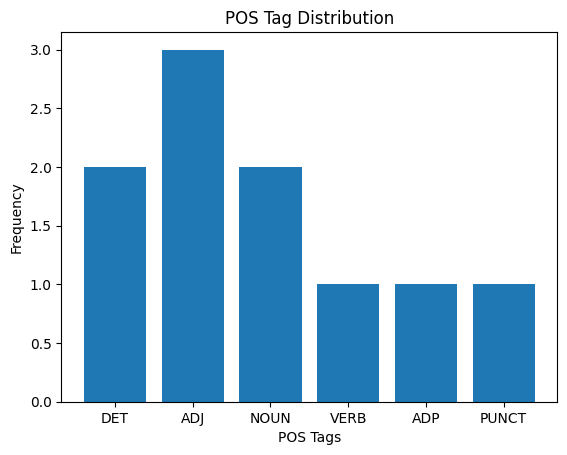

In [21]:
# Process the text
doc = nlp("The quick brown fox jumps over the lazy dog.")

# Extract and print POS tags
for token in doc:
    print(token.text, token.pos_, token.tag_)

# Count POS tags
pos_counts = Counter([token.pos_ for token in doc])

# Plot
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tag Distribution')
plt.show()
